## 序列比对

In [2]:
import pandas as pd


In [11]:
def zeros(shape):
    retval = []
    for x in range(shape[0]):
        retval.append([])
        for y in range(shape[1]):
            retval[-1].append(0)
    return retval

match_award      = 10
mismatch_penalty = -5
gap_penalty      = -5 # both for opening and extanding

def match_score(alpha, beta):
    if alpha == beta:
        return match_award
    elif alpha == '-' or beta == '-':
        return gap_penalty
    else:
        return mismatch_penalty

def finalize(align1, align2):
    align1 = align1[::-1]    #reverse sequence 1
    align2 = align2[::-1]    #reverse sequence 2
    
    i,j = 0,0
    
    #calcuate identity, score and aligned sequeces
    symbol = ''
    found = 0
    score = 0
    identity = 0
    for i in range(0,len(align1)):
        # if two AAs are the same, then output the letter
        if align1[i] == align2[i]:                
            symbol = symbol + align1[i]
            identity = identity + 1
            score += match_score(align1[i], align2[i])
    
        # if they are not identical and none of them is gap
        elif align1[i] != align2[i] and align1[i] != '-' and align2[i] != '-': 
            score += match_score(align1[i], align2[i])
            symbol += ' '
            found = 0
    
        #if one of them is a gap, output a space
        elif align1[i] == '-' or align2[i] == '-':          
            symbol += ' '
            score += gap_penalty
    
    identity = float(identity) / len(align1) * 100
    
    print ('Identity =', "%3.3f" % identity, 'percent')
    print ('Score =', score)
    print (align1)
    print (symbol)
    print (align2)


def needle(seq1, seq2):
    m, n = len(seq1), len(seq2)  # length of two sequences
    
    # Generate DP table and traceback path pointer matrix
    score = zeros((m+1, n+1))      # the DP table
   
    # Calculate DP table
    for i in range(0, m + 1):
        score[i][0] = gap_penalty * i
    for j in range(0, n + 1):
        score[0][j] = gap_penalty * j
    print(score)
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = score[i - 1][j - 1] + match_score(seq1[i-1], seq2[j-1])
            delete = score[i - 1][j] + gap_penalty
            insert = score[i][j - 1] + gap_penalty
            score[i][j] = max(match, delete, insert)

    # Traceback and compute the alignment 
    align1, align2 = '', ''
    i,j = m,n # start from the bottom right cell
    while i > 0 and j > 0: # end toching the top or the left edge
        score_current = score[i][j]
        score_diagonal = score[i-1][j-1]
        score_up = score[i][j-1]
        score_left = score[i-1][j]

        if score_current == score_diagonal + match_score(seq1[i-1], seq2[j-1]):
            align1 += seq1[i-1]
            align2 += seq2[j-1]
            i -= 1
            j -= 1
        elif score_current == score_left + gap_penalty:
            align1 += seq1[i-1]
            align2 += '-'
            i -= 1
        elif score_current == score_up + gap_penalty:
            align1 += '-'
            align2 += seq2[j-1]
            j -= 1

    # Finish tracing up to the top left cell
    while i > 0:
        align1 += seq1[i-1]
        align2 += '-'
        i -= 1
    while j > 0:
        align1 += '-'
        align2 += seq2[j-1]
        j -= 1
    print('align1:',  align1)
    print('align2: ', align2)



    finalize(align1, align2)

In [12]:
needle('ATGCAATTTT','ATCGAAT')

[[0, -5, -10, -15, -20, -25, -30, -35], [-5, 0, 0, 0, 0, 0, 0, 0], [-10, 0, 0, 0, 0, 0, 0, 0], [-15, 0, 0, 0, 0, 0, 0, 0], [-20, 0, 0, 0, 0, 0, 0, 0], [-25, 0, 0, 0, 0, 0, 0, 0], [-30, 0, 0, 0, 0, 0, 0, 0], [-35, 0, 0, 0, 0, 0, 0, 0], [-40, 0, 0, 0, 0, 0, 0, 0], [-45, 0, 0, 0, 0, 0, 0, 0], [-50, 0, 0, 0, 0, 0, 0, 0]]
align1: TTTTAACG-TA
align2:  T---AA-GCTA
Identity = 54.545 percent
Score = 35
AT-GCAATTTT
AT G AA   T
ATCG-AA---T


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('./test/mse.csv')
#!pwd

In [20]:
df

,Unnamed: 0,0
0,0,-0.133479
1,1,-0.126443
2,2,-0.145287
3,3,-0.104104
4,4,-0.260401
...,...,...
130,130,-0.281668
131,131,-0.344894
132,132,-0.789272
133,133,-0.521127


<AxesSubplot:xlabel='0'>

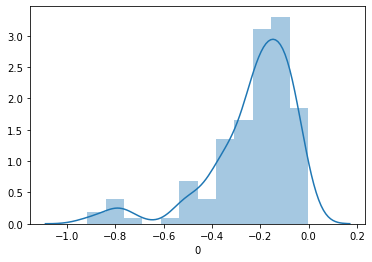

In [25]:
sns.distplot(df['0'])

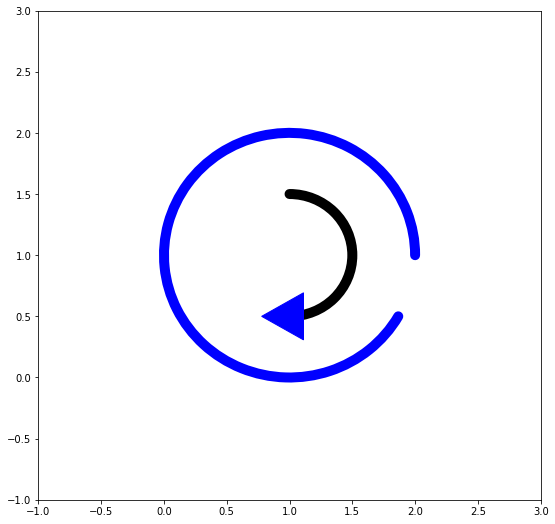

In [47]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, RegularPolygon
import numpy as np
from numpy import radians as rad

fig = plt.figure(figsize=(9,9))
ax = plt.gca()
def drawCirc(ax,radius,centX,centY,angle_,theta2_,color_='black'):
    #========Line
    arc = Arc([centX,centY],radius,radius,angle=angle_,
          theta1=0,theta2=theta2_,capstyle='round',linestyle='-',lw=10,color=color_)
    ax.add_patch(arc)


    #========Create the arrow head
    #endX=centX+(radius/2)*np.cos(rad(theta2_+angle_)) #Do trig to determine end position
    #endY=centY+(radius/2)*np.sin(rad(theta2_+angle_))
    endX = 1
    endY = 0.5
    ax.add_patch(                    #Create triangle as arrow head
        RegularPolygon(
            (endX, endY),            # (x,y)
            3,                       # number of vertices
            radius/9,                # radius
            rad(30+180),     # orientation
            color=color_
        )
    )
    ax.set_xlim([centX-radius,centY+radius]) and ax.set_ylim([centY-radius,centY+radius]) 
    # Make sure you keep the axes scaled or else arrow will distort

drawCirc(ax,1,1,1,270,180)
drawCirc(ax,2,1,1,0,330,color_='blue')
#drawCirc(ax,1,1,1,135,360)
plt.show()    
